In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
df=pd.read_csv('Sales_April_2019 (1).csv').dropna(how='all').drop_duplicates()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18268 non-null  object
 1   Product           18268 non-null  object
 2   Quantity Ordered  18268 non-null  object
 3   Price Each        18268 non-null  object
 4   Order Date        18268 non-null  object
 5   Purchase Address  18268 non-null  object
dtypes: object(6)
memory usage: 999.0+ KB


- we found that the header is repeated inside the data.

In [5]:
#change types of many columns 
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(int)

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [ ]:
df[df['Quantity Ordered']=='Quantity Ordered']

In [6]:
#I found that ther is a string values in the dataset so I Will choose data without the string values
df=df[ ~(df['Product']=='Product')]

In [7]:
#check that the problem solved
df[df['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
#change datatype to intergers
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)
df['Order Date']=pd.to_datetime(df['Order Date'])

C:\Users\Omar_Abdelhamid\AppData\Local\Temp\ipykernel_18408\2684647937.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'])


In [9]:
#in the column of address I need to stract just the city and sata
df['city']=df['Purchase Address'].str.split(',').str.get(1).str.strip()
df['state']=df['Purchase Address'].str.split(',').str.get(2).str.strip()
df['state']=df['state'].str.split().str.get(0).str.strip()

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA


In [11]:
del df['Purchase Address']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles,CA


In [12]:
df['Product'].value_counts().sort_values(ascending=False)

Product
Lightning Charging Cable      2195
USB-C Charging Cable          2075
AA Batteries (4-pack)         2062
AAA Batteries (4-pack)        1986
Wired Headphones              1889
Apple Airpods Headphones      1513
Bose SoundSport Headphones    1278
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         649
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  457
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   389
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: count, dtype: int64

In [13]:
#creat function to creat new column (product_category)
def product_category(product):
    if product in ['Google Phone', 'iPhone', 'Vareebadd Phone']:
        return 'Mobiles'
    elif product in ['Macbook Pro Laptop', 'ThinkPad Laptop']:
        return 'Laptops'
    elif product in ['27in 4K Gaming Monitor', '27in FHD Monitor', '20in Monitor', '34in Ultrawide Monitor']:
        return 'Monitors'
    elif product in  ['Bose SoundSport Headphones', 'Wired Headphones', 'Apple Airpods Headphones']:
        return 'Headphones'
    elif product in ['USB-C Charging Cable', 'Lightning Charging Cable','AA Batteries (4-pack)', 'AAA Batteries (4-pack)']:
        return 'Accessories'
    else:
        return 'Home Appliances'

In [14]:
#creat new column with category for each product
df['product_category']=df['Product'].apply(product_category)
# creat column with total price of the product
df['total price']=df['Quantity Ordered']*df['Price Each']

In [15]:
df.reindex(columns=['Order ID','Order Date','product_category','Product','Price Each','Quantity Ordered','total price','city','state'])

,Order ID,Order Date,product_category,Product,Price Each,Quantity Ordered,total price,city,state
0,176558,2019-04-19 08:46:00,Accessories,USB-C Charging Cable,11.95,2,23.90,Dallas,TX
2,176559,2019-04-07 22:30:00,Headphones,Bose SoundSport Headphones,99.99,1,99.99,Boston,MA
3,176560,2019-04-12 14:38:00,Mobiles,Google Phone,600.00,1,600.00,Los Angeles,CA
4,176560,2019-04-12 14:38:00,Headphones,Wired Headphones,11.99,1,11.99,Los Angeles,CA
5,176561,2019-04-30 09:27:00,Headphones,Wired Headphones,11.99,1,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
18378,194090,2019-04-08 17:11:00,Mobiles,Google Phone,600.00,1,600.00,Los Angeles,CA
18379,194091,2019-04-15 16:02:00,Accessories,AA Batteries (4-pack),3.84,1,3.84,Austin,TX
18380,194092,2019-04-28 14:36:00,Accessories,AAA Batteries (4-pack),2.99,2,5.98,San Francisco,CA
18381,194093,2019-04-14 15:09:00,Accessories,AA Batteries (4-pack),3.84,1,3.84,Portland,OR


In [16]:
#creat function contains all the process of clean the data to be easy to use it every month  
def clean_data(filename):
    df=pd.read_csv(filename)
    df=df.dropna(how='all')
    df.drop_duplicates(inplace=True)
    condition=df['Product']=='Product'
    df=df[ ~condition]
    
    df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
    df['Price Each']=df['Price Each'].astype(float)
    df['Order Date']=pd.to_datetime(df['Order Date'])
    
    df['city']=df['Purchase Address'].str.split(',').str.get(1).str.strip()
    df['state']=df['Purchase Address'].str.split(',').str.get(2).str.strip()
    df['state']=df['state'].str.split().str.get(0).str.strip()
    
    del df['Purchase Address']
    
    df['product_category']=df['Product'].apply(product_category)
    df['total price']=df['Quantity Ordered']*df['Price Each']
    df=df.reindex(columns=['Order ID','Order Date','product_category','Product','Price Each','Quantity Ordered','total price','city','state'])
    return df

In [17]:
clean_data('Sales_April_2019 (1).csv')

C:\Users\Omar_Abdelhamid\AppData\Local\Temp\ipykernel_18408\3466872465.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'])


,Order ID,Order Date,product_category,Product,Price Each,Quantity Ordered,total price,city,state
0,176558,2019-04-19 08:46:00,Accessories,USB-C Charging Cable,11.95,2,23.90,Dallas,TX
2,176559,2019-04-07 22:30:00,Headphones,Bose SoundSport Headphones,99.99,1,99.99,Boston,MA
3,176560,2019-04-12 14:38:00,Mobiles,Google Phone,600.00,1,600.00,Los Angeles,CA
4,176560,2019-04-12 14:38:00,Headphones,Wired Headphones,11.99,1,11.99,Los Angeles,CA
5,176561,2019-04-30 09:27:00,Headphones,Wired Headphones,11.99,1,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
18378,194090,2019-04-08 17:11:00,Mobiles,Google Phone,600.00,1,600.00,Los Angeles,CA
18379,194091,2019-04-15 16:02:00,Accessories,AA Batteries (4-pack),3.84,1,3.84,Austin,TX
18380,194092,2019-04-28 14:36:00,Accessories,AAA Batteries (4-pack),2.99,2,5.98,San Francisco,CA
18381,194093,2019-04-14 15:09:00,Accessories,AA Batteries (4-pack),3.84,1,3.84,Portland,OR


In [18]:
df.reindex(columns=['Order ID','Order Date','product_category','Product','Price Each','Quantity Ordered','total price','city','state'])

,Order ID,Order Date,product_category,Product,Price Each,Quantity Ordered,total price,city,state
0,176558,2019-04-19 08:46:00,Accessories,USB-C Charging Cable,11.95,2,23.90,Dallas,TX
2,176559,2019-04-07 22:30:00,Headphones,Bose SoundSport Headphones,99.99,1,99.99,Boston,MA
3,176560,2019-04-12 14:38:00,Mobiles,Google Phone,600.00,1,600.00,Los Angeles,CA
4,176560,2019-04-12 14:38:00,Headphones,Wired Headphones,11.99,1,11.99,Los Angeles,CA
5,176561,2019-04-30 09:27:00,Headphones,Wired Headphones,11.99,1,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
18378,194090,2019-04-08 17:11:00,Mobiles,Google Phone,600.00,1,600.00,Los Angeles,CA
18379,194091,2019-04-15 16:02:00,Accessories,AA Batteries (4-pack),3.84,1,3.84,Austin,TX
18380,194092,2019-04-28 14:36:00,Accessories,AAA Batteries (4-pack),2.99,2,5.98,San Francisco,CA
18381,194093,2019-04-14 15:09:00,Accessories,AA Batteries (4-pack),3.84,1,3.84,Portland,OR


### let's make some uni-variante analysis, and find the answeres to the following questions 


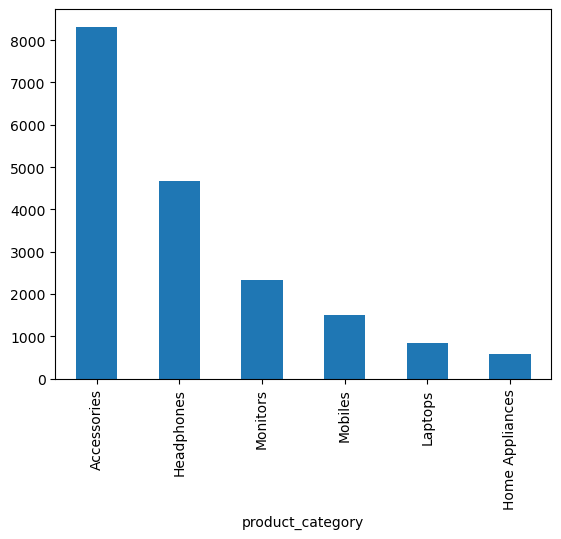

In [19]:
#1  Which category has sold more ??

df['product_category'].value_counts().plot(kind='bar');

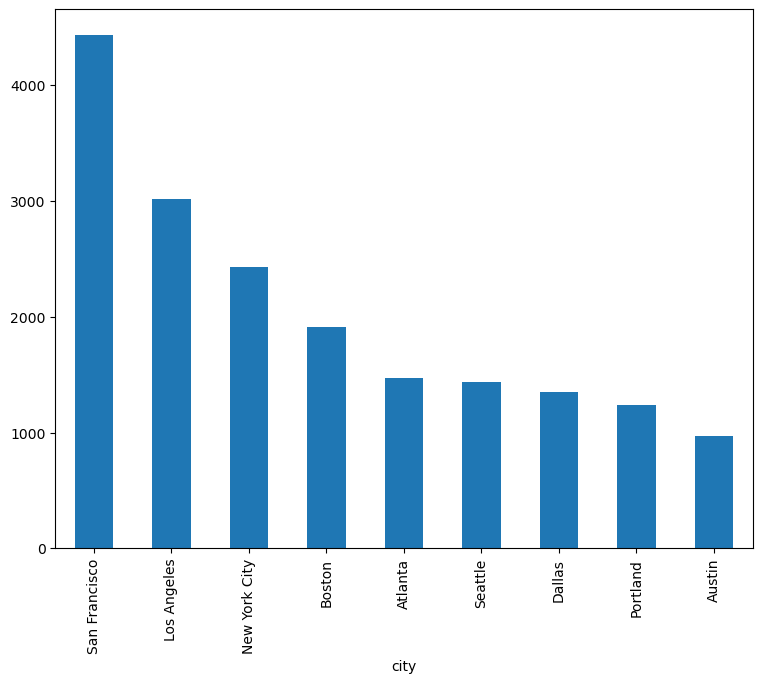

In [20]:
# What is the city that has the largest amount of sales  ??
df['city'].value_counts().plot(kind='bar',figsize=(9,7));

In [21]:
# How many items we sold for each item  
df['Product'].value_counts().sort_values(ascending=False)

Product
Lightning Charging Cable      2195
USB-C Charging Cable          2075
AA Batteries (4-pack)         2062
AAA Batteries (4-pack)        1986
Wired Headphones              1889
Apple Airpods Headphones      1513
Bose SoundSport Headphones    1278
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         649
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  457
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   389
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: count, dtype: int64

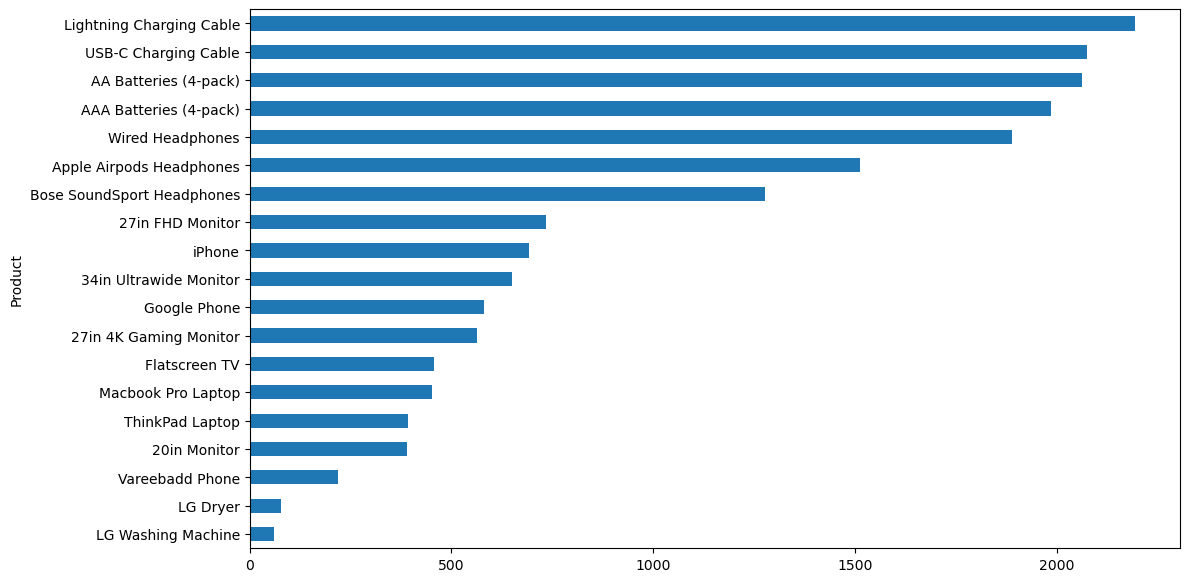

In [22]:
# How many items we sold for each item  
df['Product'].value_counts().sort_values().plot(kind='barh',figsize=(12,7));

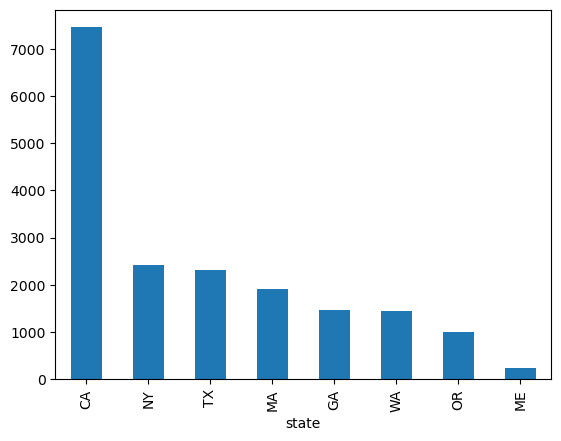

In [71]:
df['state'].value_counts().plot(kind='bar');

In [73]:
df.groupby('product_category')['total price'].sum()

product_category
Accessories          82037.76
Headphones          381796.49
Home Appliances     220200.00
Laptops            1165496.08
Mobiles             923100.00
Monitors            621976.52
Name: total price, dtype: float64

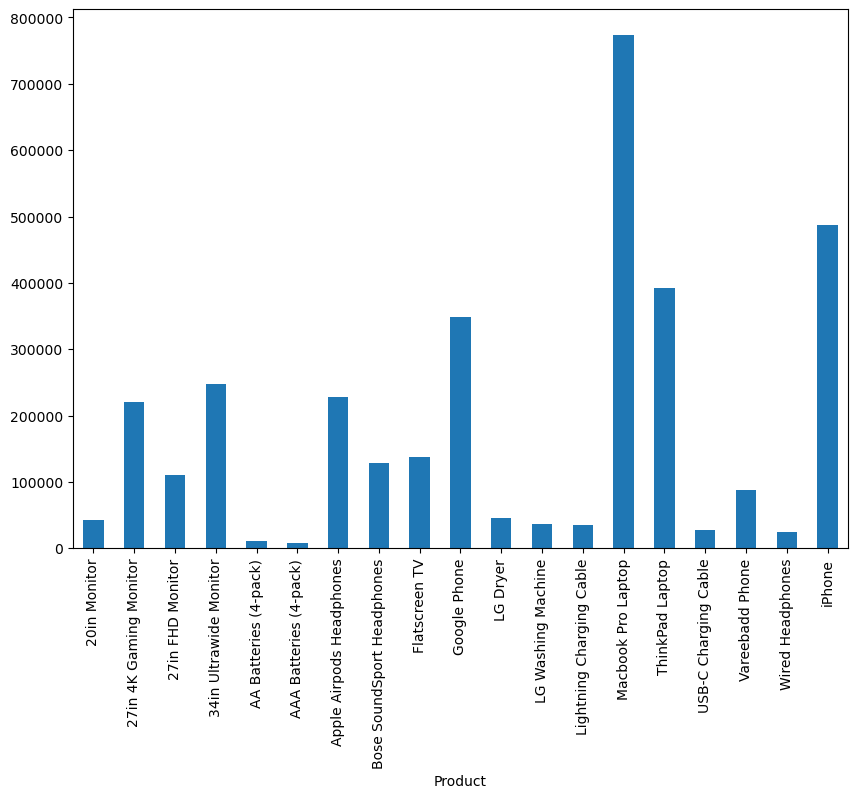

In [78]:
df.groupby('Product')['total price'].sum().plot(kind='bar',figsize=(10,7));

#### what is the quantity of items that soled for each product??

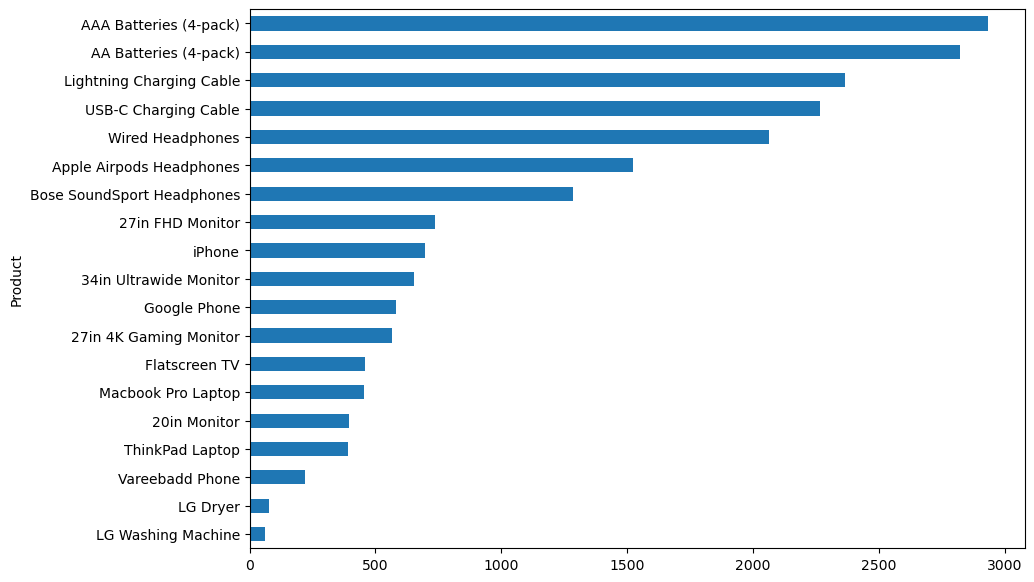

In [81]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values().plot(kind='barh',figsize=(10,7));

In [86]:
df.describe(include=['object','category'])

,Order ID,Product,city,state,product_category
count,18267,18267,18267,18267,18267
unique,17537,19,9,8,6
top,193511,Lightning Charging Cable,San Francisco,CA,Accessories
freq,4,2195,4434,7455,8318
